In [55]:
import librosa
import librosa.display
import soundfile as sf
import skimage.io

import numpy as np
import matplotlib.pyplot as plt


In [56]:
import wave

data = wave.open('../audio_processing/samples/sample_b.wav', mode = 'rb')
params = data.getparams()
print(params)

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=141120, comptype='NONE', compname='not compressed')


In [57]:
# Load the stereo audio file
audio_a, sr_a = librosa.load('../audio_processing/samples/sample_a.wav', mono = False)

audio_b, sr_b = librosa.load('../audio_processing/samples/sample_b.wav', mono = False)

# Split the stereo audio into two mono channels
# channel_left = audio[:,0]
# channel_right = audio[:,1]

left_channel_a, right_channel_a = audio_a[0], audio_a[1]
left_channel_b, right_channel_b = audio_b[0], audio_b[1]


sr_a

22050

In [58]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, n_fft, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            n_fft=n_fft, hop_length=hop_length)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)

C:\Users\bo\AppData\Local\Temp\ipykernel_9228\3499667353.py:10: FutureWarning: Pass y=[[-2.0316402e-05 -6.8270529e-05 -5.6002456e-05 ...  1.7880141e-04
   1.1703302e-04  2.5122374e-05]
 [-1.9203882e-05 -6.8656336e-05 -6.0522412e-05 ...  1.7914711e-04
   1.1688263e-04  2.5115673e-05]] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  F = librosa.feature.melspectrogram(audio_a, n_fft=size, hop_length = int(size*m), win_length = int(size*m))


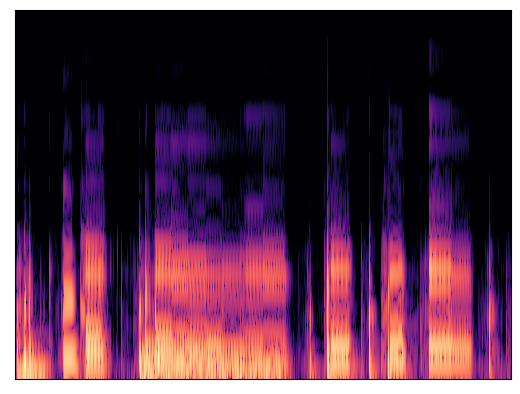

In [75]:
# test = librosa.feature.melspectrogram(y=audio, sr=sr)

size = 2048
m = 1/32

# Passing through arguments to the Mel filters
D = librosa.stft(audio_a, n_fft=size, hop_length = int(size*m), win_length = int(size*m))  # STFT of y
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

F = librosa.feature.melspectrogram(audio_a, n_fft=size, hop_length = int(size*m), win_length = int(size*m))
F_db = librosa.amplitude_to_db(np.abs(F), ref=np.max)


fig, ax = plt.subplots()
img = librosa.display.specshow(D_db[0], n_fft=size, hop_length = int(size), win_length = int(size*m))
fig.patch.set_visible(False)


In [60]:
# interpolated_signals = [audio_a + (audio_b - audio_a) * i / 14 for i in range(1, 15)]

# from scipy.io.wavfile import write


# for i, y in enumerate(interpolated_signals):
#     sf.write('../audio_processing/output/interpolated_signal_{}.wav'.format(i+2), np.column_stack((y[0], y[1])), sr_a, subtype='PCM_16')

In [68]:
# out = '../audio_processing/output/image.png'

# hop_length = int(size*m) # number of samples per time-step in spectrogram
# n_mels = int(size*m) # number of bins in spectrogram. Height of image
# time_steps = size # number of time-steps. Width of image

# # extract a fixed length window
# start_sample = 0 # starting at beginning
# length_samples = time_steps*hop_length
# window = left_channel_a[start_sample:start_sample+length_samples]

# # convert to PNG
# spectrogram_image(window, sr=sr_a, out=out, hop_length=hop_length, n_mels=n_mels)
# print('wrote file', out)

wrote file ../audio_processing/output/image.png


In [87]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

In [90]:
audio_filename = '../audio_processing/samples/sample_b.wav'

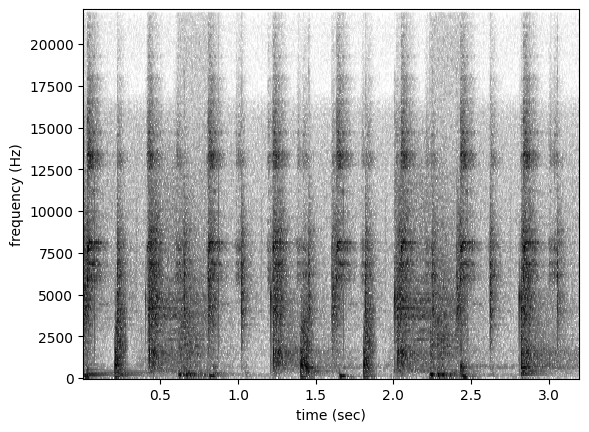

In [91]:
audio_object = Audio.from_file(audio_filename)
spectrogram_object = Spectrogram.from_audio(audio_object)
spectrogram_object.plot()

In [101]:
from pathlib import Path
image_shape = (44100, 3000) #(height, width) not (width, height)
image_path = Path('../audio_processing/output/saved_image.png')
spectrogram_image = spectrogram_object.to_image(shape=image_shape,invert=True)
spectrogram_image.save(image_path)